In [1]:
import pandas as pd 
from datetime import datetime
from datetime import timedelta
import os

from tqdm import tnrange, tqdm_notebook, tqdm

In [2]:
from sklearn import preprocessing

In [3]:
import numpy as np

In [4]:
"""from google.colab import drive
drive.mount("/content/gdrive")"""

'from google.colab import drive\ndrive.mount("/content/gdrive")'

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
#btc_data = pd.read_csv("/content/gdrive/My Drive/capstone project/datasets/prices/Bitcoin_data.csv") 
btc_data = pd.read_csv("/content/gdrive/My Drive/capstone project/datasets/prices/Bitcoin_prices.csv") 

In [7]:
#Change Date to utc in bitcoin data
btc_data['Date'] = pd.to_datetime(btc_data['Date'], utc = True)  

In [8]:
btc_data.to_csv("/content/gdrive/My Drive/capstone project/modified datasets/Bitcoin data timestamp.csv")

In [9]:
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-05 00:00:00+00:00,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
1,2021-02-06 00:00:00+00:00,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2,2021-02-07 00:00:00+00:00,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
3,2021-02-08 00:00:00+00:00,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
4,2021-02-09 00:00:00+00:00,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886


In [10]:
#btc_data.rename(columns = {'Date':'timestamp'}, inplace = True)

In [11]:
#btc_data.head()


In [12]:
dates=[str(i)[:10] for i in list(btc_data.Date)]

In [13]:
btc_data.Date=dates

In [14]:
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
1,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
3,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
4,2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886


In [24]:

folder = "/content/gdrive/MyDrive/capstone project/modified datasets/CleanedDataset.csv"
  
#print(folder)

#get tweets
tweet_data = pd.read_csv(folder)



In [16]:
"""#Round timestamps to nearest day
tweet_data['date'] = pd.to_datetime(tweet_data['date'], utc = True,errors='coerce') 
tweet_data['date'] = tweet_data['date'].apply(lambda dt: dt.round('1d'))"""

"#Round timestamps to nearest day\ntweet_data['date'] = pd.to_datetime(tweet_data['date'], utc = True,errors='coerce') \ntweet_data['date'] = tweet_data['date'].apply(lambda dt: dt.round('1d'))"

In [25]:
tweet_data.user_followers.values

array([8534., 6769.,  128., ...,   82.,   24.,   78.])

In [18]:
#x ′ = ( x − x m i n ) / ( x m a x − x m i n )
def normalizeCol(col):
  col=list(col)
  maxx=max(col)
  mini=min(col)
  for i in range(len(col)):
    col[i]=(col[i]-mini)/(maxx-mini)
  return col

In [26]:
tweet_data

,user_name,user_description,user_followers,user_verified,date,text,score
0,DeSota Wilson,"Biz Consultant, real estate, fintech, startups...",8534.0,False,2021-02-10,Blue Ridge Bank shares halted by NYSE after at...,0.2960
1,CryptoND,😎 BITCOINLIVE is a Dutch platform aimed at inf...,6769.0,False,2021-02-10,"😎 Today, that's this Thursday, we will do a ""🎬...",0.4939
2,Tdlmatias,"IM Academy : The best #forex, #SelfEducation, ...",128.0,False,2021-02-10,"Guys evening, I have read this article about B...",0.5719
3,Crypto is the future,I will post a lot of buying signals for BTC tr...,625.0,False,2021-02-10,$BTC A big chance in a billion! Price: \487264...,0.3164
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Co-founder @RENJERJerky | Forbes 30Under30 | I...,1249.0,False,2021-02-10,This network is secured by parent is watching ...,0.4019
...,...,...,...,...,...,...,...
2830318,Juniho LRD,"A Certified Computer Engineer, Graphic Designe...",81.0,False,2022-04-13,"very good project, don't miss it friends, let'...",0.5078
2830319,SEMANES,"📲 Pls, Follow me for becoming a better communi...",23.0,False,2022-04-13,"You became 8.5% poorer, if you held fiat.",-0.3612
2830320,WJGESQ,NaN,82.0,False,2022-04-13,My tears in my eyes preference is of no conseq...,0.0772
2830321,chris,NaN,24.0,False,2022-04-13,Legacy markets open flat? was flat? Off hours ...,0.7820


In [27]:
dats=set([i for i in tweet_data.date])
dats=list(dats)
dats.sort()
print(dats[0],dats[-1],len(dats))


2021-02-05  2022-04-16  136


In [28]:
a=pd.date_range(start="2021-02-05",end="2022-04-16")
len(a)

436

In [22]:
"""tweet_data.user_followers=normalizeCol(tweet_data.user_followers)
tweet_data.profession_score=normalizeCol(tweet_data.profession_score)"""


'tweet_data.user_followers=normalizeCol(tweet_data.user_followers)\ntweet_data.profession_score=normalizeCol(tweet_data.profession_score)'

In [48]:
tweet_data.head()

,user_name,user_description,user_followers,user_verified,date,text,score,final_score,profession_score
0,DeSota Wilson,"Biz Consultant, real estate, fintech, startups...",8534.0,False,2021-02-10,Blue Ridge Bank shares halted by NYSE after at...,0.2960,NaN,0
1,CryptoND,😎 BITCOINLIVE is a Dutch platform aimed at inf...,6769.0,False,2021-02-10,"😎 Today, that's this Thursday, we will do a ""🎬...",0.4939,NaN,0
2,Tdlmatias,"IM Academy : The best #forex, #SelfEducation, ...",128.0,False,2021-02-10,"Guys evening, I have read this article about B...",0.5719,NaN,0
3,Crypto is the future,I will post a lot of buying signals for BTC tr...,625.0,False,2021-02-10,$BTC A big chance in a billion! Price: \487264...,0.3164,NaN,0
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Co-founder @RENJERJerky | Forbes 30Under30 | I...,1249.0,False,2021-02-10,This network is secured by parent is watching ...,0.4019,NaN,0


In [49]:
#tweet_data is the modified dataframe containing all the tweets 
scores = []
for i, s in tqdm(tweet_data.iterrows(), total=tweet_data.shape[0],position=0, leave=True):
    try:
        scores.append(s["score"] * ((s["user_followers"])) *(s["profession_score"]+1))
    except:
        scores.append(np.nan)
tweet_data["final_score"] = scores
tweet_data.head()

100%|██████████| 2830323/2830323 [02:43<00:00, 17303.57it/s]


,user_name,user_description,user_followers,user_verified,date,text,score,final_score,profession_score
0,DeSota Wilson,"Biz Consultant, real estate, fintech, startups...",8534.0,False,2021-02-10,Blue Ridge Bank shares halted by NYSE after at...,0.2960,2526.0640,0
1,CryptoND,😎 BITCOINLIVE is a Dutch platform aimed at inf...,6769.0,False,2021-02-10,"😎 Today, that's this Thursday, we will do a ""🎬...",0.4939,3343.2091,0
2,Tdlmatias,"IM Academy : The best #forex, #SelfEducation, ...",128.0,False,2021-02-10,"Guys evening, I have read this article about B...",0.5719,73.2032,0
3,Crypto is the future,I will post a lot of buying signals for BTC tr...,625.0,False,2021-02-10,$BTC A big chance in a billion! Price: \487264...,0.3164,197.7500,0
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Co-founder @RENJERJerky | Forbes 30Under30 | I...,1249.0,False,2021-02-10,This network is secured by parent is watching ...,0.4019,501.9731,0


In [ ]:
#tweet_data["final_score_norm"]=normalizeCol(tweet_data.final_score)

In [ ]:
#tweet_data.drop(["user_favourites","user_friends"])

In [ ]:
#tweet_data.rename(columns = {'date':'timestamp'}, inplace = True)

In [ ]:
#d is date:[volume,avg score]

In [51]:
d={}
for i in range(len(tweet_data.user_name)):
  if tweet_data.date[i] in d:
    d[tweet_data.date[i]][0]+=1
    d[tweet_data.date[i]][1]+=tweet_data.score[i]
  else:
    d[tweet_data.date[i]]=[1,tweet_data.score[i]]

In [52]:
#taking avg
for i in d:
  d[i][1]=d[i][1]/d[i][0]

In [54]:
#final_score is date:[volume,avg final_score]
final_score={}
for i in range(len(tweet_data.user_name)):
  if tweet_data.date[i] in final_score:
    final_score[tweet_data.date[i]][0]+=1 #volume of tweets
    final_score[tweet_data.date[i]][1]+=tweet_data.final_score[i] #sum of tweet scores for that day
  else:
    final_score[tweet_data.date[i]]=[1,tweet_data.final_score[i]]
#taking avg
for i in final_score:
  final_score[i][1]=final_score[i][1]/final_score[i][0]  # average tweet score for that day

In [ ]:
#combine

In [55]:
tweet_dates=[i.strip() for i in list(final_score.keys())]

vol=[]
avg=[]
for i in list(final_score.values()):
  vol.append(i[0])
  avg.append(i[1])



In [56]:
tweet_aggregates = pd.DataFrame(
    {
        "Date": tweet_dates,
        "Tweet_volume":vol,
        "Avg_score": avg,
        
    }
    
)

In [57]:
tweet_aggregates.head()

,Date,Tweet_volume,Avg_score
0,2021-02-10,3526,640.179806
1,2021-02-09,4350,1394.978194
2,2021-02-08,5647,1328.579672
3,2021-02-07,3030,219.357551
4,2021-02-06,3278,498.539178


In [3]:
data=pd.read_csv("/content/gdrive/MyDrive/capstone project/modified datasets/CleanedDataset (2).csv")

In [47]:
#tweet_data["profession_score"]=data["profession_score"]

In [4]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,user_profession,score,profession_score
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10,Blue Ridge Bank shares halted by NYSE after AT...,-,0.2960,0
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,False,2021-02-10,"😎 Today, that's this Thursday, we will do a ""🎬...",-,0.4939,0
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332.0,924.0,False,2021-02-10,"Guys evening, I have read this article about B...",-,0.5719,0
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129.0,14.0,False,2021-02-10,$BTC A big chance in a billion! Price: \487264...,-,0.3164,0
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472.0,10482.0,False,2021-02-10,This network is secured by 9 508 nodes as of t...,-,0.4019,0


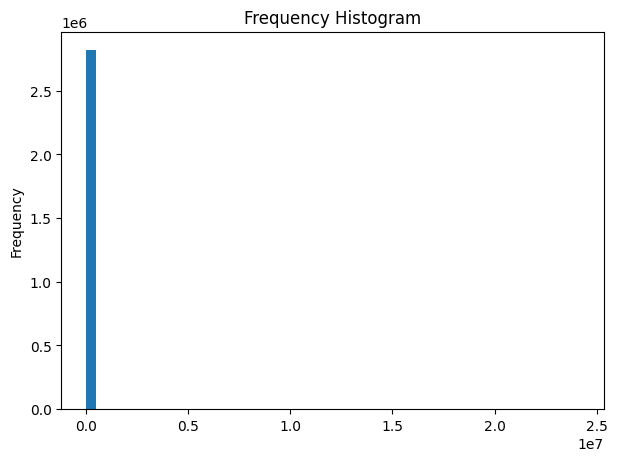

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x



In [17]:
type(data.user_followers[3])

numpy.float64

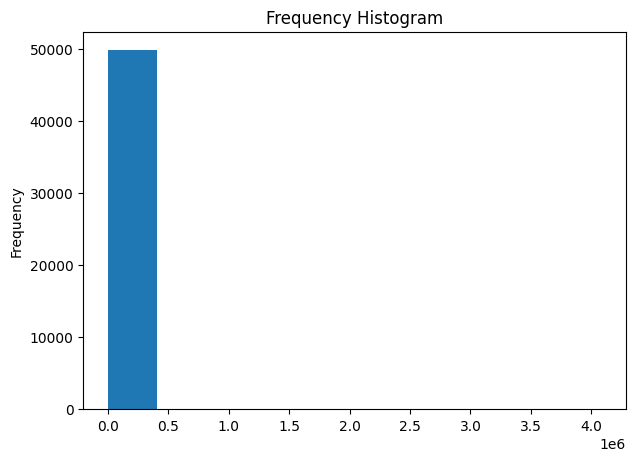

In [20]:
plt.hist(data.user_followers[:50000)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [21]:
data.user_followers.median()

205.0

In [12]:
len(data.user_followers)

2830323

In [16]:
len([i for i in data.user_followers if i>188225])

14073

In [46]:
#len(data["user_name"])

2830323

In [ ]:
"""tweet_aggregates["Avg_score_norm"]=normalizeCol(tweet_aggregates.Avg_score)
tweet_aggregates["Tweet_volume_norm"]=normalizeCol(tweet_aggregates.Tweet_volume)"""


In [ ]:
#tweet_aggregates.to_csv('/content/gdrive/My Drive/capstone project/modified datasets/tweet_aggregates.csv',index=False)

In [ ]:
#final_price_data = btc_data.merge(tweet_aggregates, how="outer", on="Date")

In [ ]:
print(max(btc_data.Date),min(btc_data.Date),type(btc_data.Date[0]))
print(max(tweet_aggregates.Date),min(tweet_aggregates.Date),type(tweet_aggregates.Date[0]))

In [70]:
#btc_data => bitcoin prices
#tweet_aggregates => daily bitcoin tweet aggregates
combined_data=pd.merge(btc_data,tweet_aggregates,how="left",on="Date",sort=True)

In [63]:
combined_data.head()

,Date,Open,High,Low,Close,Tweet_volume,Avg_score
0,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,1694.0,592.361387
1,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,3278.0,498.539178
2,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,3030.0,219.357551
3,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,5647.0,1328.579672
4,2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,4350.0,1394.978194


In [68]:
final_price_data.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Tweet_volume    0
Avg_score       0
dtype: int64

In [67]:
final_price_data.index=pd.to_datetime(final_price_data['Date'],format='%Y-%m-%d')
final_price_data.interpolate(method='time', inplace=True)

In [62]:
final_price_data.drop(["Volume"	],axis=1,inplace=True)
final_price_data.drop(["Adj Close"],axis=1,inplace=True)

In [ ]:
#final_data = final_data.dropna(axis=0, subset=['Close'])

In [69]:
final_price_data.to_csv(r'/content/gdrive/MyDrive/capstone project/modified datasets/Final_df(1).csv',index=False)

In [ ]:
#d=pd.read_csv('/content/gdrive/My Drive/capstone project/modified datasets/Final_df.csv')

In [ ]:
"""data=pd.read_csv('/content/gdrive/My Drive/capstone project/modified datasets/merged data.csv')
data"""